Lambda School Data Science

*Unit 1, Sprint 1, Module 3*

---

# Lambda School Data Science - Making Data-backed Assertions

This is, for many, the main point of data science - to create and support reasoned arguments based on evidence. It's not a topic to master in a day, but it is worth some focused time thinking about and structuring your approach to it.

## Lecture - generating a confounding variable

The prewatch material told a story about a hypothetical health condition where both the drug usage and overall health outcome were related to gender - thus making gender a confounding variable, obfuscating the possible relationship between the drug and the outcome.

Let's use Python to generate data that actually behaves in this fashion!

In [0]:
# import random so we can create to random tests.
import random

# show the directory of what we can do with 'random' 
dir(random)  # reminding ourselves what we can do here

['BPF',
 'LOG4',
 'NV_MAGICCONST',
 'RECIP_BPF',
 'Random',
 'SG_MAGICCONST',
 'SystemRandom',
 'TWOPI',
 '_BuiltinMethodType',
 '_MethodType',
 '_Sequence',
 '_Set',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_acos',
 '_bisect',
 '_ceil',
 '_cos',
 '_e',
 '_exp',
 '_inst',
 '_itertools',
 '_log',
 '_pi',
 '_random',
 '_sha512',
 '_sin',
 '_sqrt',
 '_test',
 '_test_generator',
 '_urandom',
 '_warn',
 'betavariate',
 'choice',
 'choices',
 'expovariate',
 'gammavariate',
 'gauss',
 'getrandbits',
 'getstate',
 'lognormvariate',
 'normalvariate',
 'paretovariate',
 'randint',
 'random',
 'randrange',
 'sample',
 'seed',
 'setstate',
 'shuffle',
 'triangular',
 'uniform',
 'vonmisesvariate',
 'weibullvariate']

In [0]:
# we want to create a data set so we are going to create a tuple.
from collections import namedtuple

# create the columns and label the tuple.
User = namedtuple('User', ['purchased','time_on_site', 'mobile'])

# create some data for an example user.
example_user = User(False, 12, False)

# show the example user data.
example_user

User(purchased=False, time_on_site=12, mobile=False)

In [0]:
# Let's think of another scenario:
# We work for a company that sells accessories for mobile phones.
# They have an ecommerce site, and we are supposed to analyze logs
# to determine what sort of usage is related to purchases, and thus guide
# website development to encourage higher conversion.

# The hypothesis - users who spend longer on the site tend
# to spend more. Seems reasonable, no?

# But there's a confounding variable! If they're on a phone, they:
# a) Spend less time on the site, but
# b) Are more likely to be interested in the actual products!

# Let's use namedtuple to represent our data

from collections import namedtuple
# purchased and mobile are bools, time_on_site in seconds
User = namedtuple('User', ['purchased','time_on_site', 'mobile'])

example_user = User(False, 12, False)
print(example_user)

User(purchased=False, time_on_site=12, mobile=False)


In [0]:
# import numpy to generate #s.
import numpy as np

# random.normal() will generate a random number.
np.random.normal(10,2)

8.814916311328226

In [0]:
# And now let's generate 1000 example users
# 750 mobile, 250 not (i.e. desktop)
# A desktop user has a base conversion likelihood of 10%
# And it goes up by 1% for each 15 seconds they spend on the site
# And they spend anywhere from 10 seconds to 10 minutes on the site (uniform)
# Mobile users spend on average half as much time on the site as desktop
# But have three times as much base likelihood of buying something

# label the data we are generating.
users = []

for _ in range(250):
  # Desktop users
  # time_on_site = random.uniform(10, 600)
  time_on_site = np.random.normal(9.4*60, 3*60)
  purchased = random.random() < 0.1 + (time_on_site / 1500)
  users.append(User(purchased, time_on_site, False))
  
for _ in range(750):
  # Mobile users
  # time_on_site = random.uniform(5, 300)
  time_on_site = np.random.normal(7.5*60, 2.5*60)
  purchased = random.random() < 0.3 + (time_on_site / 1500)
  users.append(User(purchased, time_on_site, True))
  
# always good to shuffle the data that is random.  
  random.shuffle(users)
  
# show 10 users.  
users[:10]

[User(purchased=False, time_on_site=213.73610857284535, mobile=True),
 User(purchased=True, time_on_site=723.0963049688538, mobile=False),
 User(purchased=True, time_on_site=679.3037458251049, mobile=False),
 User(purchased=True, time_on_site=507.7162852760827, mobile=True),
 User(purchased=False, time_on_site=347.09221600612045, mobile=True),
 User(purchased=True, time_on_site=418.99839335573364, mobile=True),
 User(purchased=False, time_on_site=493.6690356348573, mobile=False),
 User(purchased=True, time_on_site=681.1076446013667, mobile=False),
 User(purchased=True, time_on_site=218.08425310333644, mobile=True),
 User(purchased=True, time_on_site=612.975109579224, mobile=True)]

In [0]:
# we can put this in a dataframe so we can look at it more easily.

# import pandas library.
import pandas as pd

# label the data set and load the 'user' data we generated.
user_data = pd.DataFrame(users)

# show the data set headers.
user_data.head()

,purchased,time_on_site,mobile
0,False,213.736109,True
1,True,723.096305,False
2,True,679.303746,False
3,True,507.716285,True
4,False,347.092216,True


In [0]:
# add a new column for converting seconds to minutes (for comparison reasons).
user_data['time_on_site_min'] = user_data['time_on_site'] / 60

# show the new data set with the new column.
user_data.head()

,purchased,time_on_site,mobile,time_on_site_min
0,False,213.736109,True,3.562268
1,True,723.096305,False,12.051605
2,True,679.303746,False,11.321729
3,True,507.716285,True,8.461938
4,False,347.092216,True,5.784870


In [0]:
# we can look for any negative data in the data set.
user_data[user_data.time_on_site < 0.0]

,purchased,time_on_site,mobile,time_on_site_min


In [0]:
# we are converting all negative data for 'time_on_site' to 0's.
user_data.loc[user_data['time_on_site'] < 0.0, 'time_on_site'] = 0.0

# comfirm there are no negatives in 'time_on_site'.
user_data[user_data.time_on_site < 0.0] # confirm no -#'s'

,purchased,time_on_site,mobile,time_on_site_min


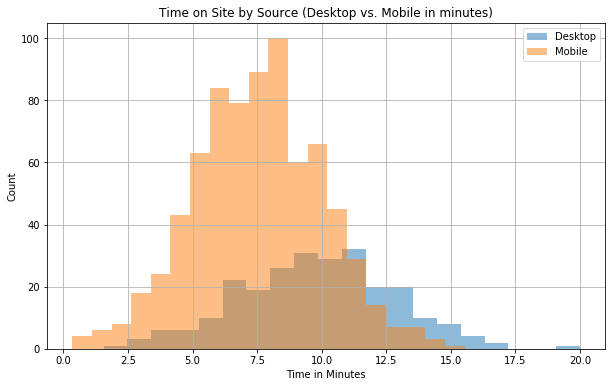

In [0]:
# import mat plotlib.pyplot as plt.
import matplotlib.pyplot as plt

# create a groupby graph with the 'mobile' and 'time_on_site' columns, (set 'bins', transparency 'alpha', figsize).
user_data.groupby('mobile').time_on_site_min.hist(bins=20, alpha=0.5, figsize=(10,6));

# give the graph a title.
plt.title('Time on Site by Source (Desktop vs. Mobile in minutes)');

# label the y axis.
plt.ylabel('Count')

# label the x axis.
plt.xlabel('Time in Minutes')

# create a legend for the data.
plt.legend(['Desktop','Mobile']);

In [0]:
# use crosstabulation to try to see what's going on with certain columns.
pd.crosstab(user_data['purchased'], user_data['time_on_site'])

time_on_site,20.901311214013447,35.59513597576182,50.39386230423554,57.100306749016625,67.43721964459081,77.49406178868765,82.22646871447466,91.07575392498376,93.4996265771951,103.73994534465038,107.79260217460416,115.86899265709616,129.43214944908368,140.28024804674703,140.36376730675715,143.54235922161058,144.60320632562036,146.00755621586256,151.29276950506102,158.96243594809113,159.50424634572641,160.17207869642795,161.26868415401054,161.90590815976515,165.24250413923187,165.59062250423347,171.01779917837888,171.4264849761899,173.15406205251486,178.48600145354033,180.81212697811281,182.73246066820144,186.55803878107548,187.30037947253425,189.14277875873438,192.45462332255227,193.22569935380574,198.4167650949025,201.1840004917193,201.26115284968418,...,798.3784285684678,798.4545639151692,800.8159819644222,801.4779842000253,807.3859624330028,811.9688394868136,814.1072231377157,815.2099919288039,817.216652066347,822.5019220601134,824.5651640115531,828.8480927643718,834.1176810138736,834.5977811661745,838.3168190327178,842.3154082641784,843.5135821484162,844.4476967674002,848.8076656963108,852.0933560469117,857.4658770264202,863.2117139302,865.0311937892379,866.6961588087913,867.9730050672244,881.1844575215459,881.90873922983,887.0152089320361,891.1660797085187,897.416248643302,904.0656412708544,917.3307271809779,923.4673901148032,925.4811210303114,931.8100407833455,933.4159364954653,976.6414811235421,997.6586830498455,1023.3648131047935,1199.4512401268923
purchased,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
False,1,0,1,1,0,1,1,1,1,1,0,1,0,0,1,1,0,1,1,0,0,1,0,1,0,0,1,1,0,0,0,1,1,0,0,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,1,1,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0
True,0,1,0,0,1,0,0,0,0,0,1,0,1,1,0,0,1,0,0,1,1,0,1,0,1,1,0,0,1,1,1,0,0,1,1,0,0,1,1,1,...,1,1,1,1,1,0,1,1,1,0,1,1,1,0,1,0,0,0,0,1,1,1,0,1,0,1,1,1,0,1,0,1,1,1,1,0,1,1,1,1


In [0]:
# OK, that's not quite what we want
# Time is continuous! We need to put it in discrete buckets
# Pandas calls these bins, and pandas.cut helps make them

# create 5 bins from the 'time_on_site' column.
time_bins = pd.cut(user_data['time_on_site_min'], 5)  # 5 equal-sized bins

# now we can crosstab and compare the 2 columns.
pd.crosstab(time_bins, user_data['purchased'], normalize='columns')

purchased,False,True
time_on_site_min,,
"(0.329, 4.277]",0.108247,0.055556
"(4.277, 8.205]",0.469072,0.429739
"(8.205, 12.134]",0.358247,0.424837
"(12.134, 16.062]",0.064433,0.083333
"(16.062, 19.991]",0.000000,0.006536


In [0]:
# crosstab and compare the column with the bins.
pd.crosstab(columns=user_data['purchased'], index=time_bins, normalize='index')

purchased,False,True
time_on_site_min,,
"(0.329, 4.277]",0.552632,0.447368
"(4.277, 8.205]",0.408989,0.591011
"(8.205, 12.134]",0.348371,0.651629
"(12.134, 16.062]",0.328947,0.671053
"(16.062, 19.991]",0.000000,1.000000


In [0]:
# We can make this a bit clearer by normalizing (getting %)
pd.crosstab(time_bins, user_data['purchased'], normalize='columns')

purchased,False,True
time_on_site_min,,
"(0.329, 4.277]",0.108247,0.055556
"(4.277, 8.205]",0.469072,0.429739
"(8.205, 12.134]",0.358247,0.424837
"(12.134, 16.062]",0.064433,0.083333
"(16.062, 19.991]",0.000000,0.006536


In [0]:
# That seems counter to our hypothesis
# More time on the site can actually have fewer purchases

# But we know why, since we generated the data!
# Let's look at mobile and purchased
pd.crosstab(user_data['purchased'], user_data['mobile'], normalize='columns')

mobile,False,True
purchased,,
False,0.464,0.362667
True,0.536,0.637333


In [0]:
# Yep, mobile users are more likely to buy things
# But we're still not seeing the *whole* story until we look at all 3 at once

# Live/stretch goal - how can we do that?
pd.crosstab(time_bins, [user_data['purchased'], user_data['mobile']], normalize='columns')

purchased            False               True           
mobile               False     True      False     True 
time_on_site_min                                        
(0.329, 4.277]    0.043103  0.136029  0.037313  0.060669
(4.277, 8.205]    0.293103  0.544118  0.186567  0.497908
(8.205, 12.134]   0.482759  0.305147  0.529851  0.395397
(12.134, 16.062]  0.181034  0.014706  0.216418  0.046025
(16.062, 19.991]  0.000000  0.000000  0.029851  0.000000

In [0]:
pd.crosstab(time_bins, user_data['purchased'], normalize='columns')

purchased,False,True
time_on_site_min,,
"(0.329, 4.277]",0.108247,0.055556
"(4.277, 8.205]",0.469072,0.429739
"(8.205, 12.134]",0.358247,0.424837
"(12.134, 16.062]",0.064433,0.083333
"(16.062, 19.991]",0.000000,0.006536


## Stanford Open Police Project
https://openpolicing.stanford.edu/findings/

In [0]:
%%time
df = pd.read_csv('https://stacks.stanford.edu/file/druid:jb084sr9005/jb084sr9005_nj_statewide_2019_02_25.csv.zip')
df = df.sample(100000)
print(df.shape)

(100000, 20)
CPU times: user 19.5 s, sys: 2.31 s, total: 21.8 s
Wall time: 52.5 s


In [0]:
df.head()

,raw_row_number,date,time,location,subject_race,subject_sex,officer_id_hash,department_id,type,violation,arrest_made,citation_issued,warning_issued,outcome,frisk_performed,search_conducted,vehicle_color,vehicle_make,vehicle_model,vehicle_registration_state
1894149,5595711,2016-11-18,22:26:03,"@US 202 SB MP 3.1 WEST AMWELL TWP-HUN C040, We...",white,male,551c818253,C040,vehicular,39:3-76.2F REQ WEARING SEATBELTS,NaN,True,False,citation,NaN,NaN,BLK,Nissan,NaN,NH
3491766,3743392,2014-06-10,14:33:59,"@GSP NB MP 139.5 KENILWORTH BORO-UNI E040, Ken...",white,female,f68da98a8f,E040,vehicular,39:4-88A FAILURE TO KEEP RIGHT (PASSENGER CAR),NaN,False,True,warning,NaN,NaN,NaN,Chevrolet,NaN,NJ
2310569,4844861,2015-12-30,15:36:08,"CALHOUN/PASSAIC, Trenton City",hispanic,male,8b307ec4ca,C410,vehicular,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BLK,Dodge,NaN,NJ
3251545,4308900,2015-04-02,06:38:23,"@GSP NB MP 58 LITTLE EGG HARBOR TWP-OCE E030, ...",white,male,13637ca703,E030,vehicular,39:4-97 CARELESS DRIVING,NaN,False,True,warning,NaN,NaN,RED,Toyota,NaN,NJ
312233,2527978,2012-06-28,23:27:55,"295 NB 13.6, Logan Twp",black,male,b00b71386f,A140,vehicular,39:4-126 APPROPRIATE SIGNALS,NaN,False,True,warning,NaN,NaN,GRY,Hyundai,NaN,NJ


In [0]:
df.isna().sum()

raw_row_number                    0
date                              0
time                              0
location                          0
subject_race                   2882
subject_sex                     458
officer_id_hash                   0
department_id                     0
type                              0
violation                     24183
arrest_made                   96807
citation_issued               22449
warning_issued                22642
outcome                       22293
frisk_performed               96459
search_conducted              96359
vehicle_color                  2768
vehicle_make                   3830
vehicle_model                 75315
vehicle_registration_state      710
dtype: int64

In [0]:
# What are the most common violations?
df.violation.value_counts().head(10)

39:4-97 CARELESS DRIVING                          18730
39:4-98 RATES OF SPEED                             7852
39:4-88B UNSAFE LANE CHANGE                        5746
39:3-76.2F REQ WEARING SEATBELTS                   4770
39:4-56 DELAYING TRAFFIC                           4352
39:3-66 MAINTENANCE ILLUM DEVICE                   3512
39:4-97.3 USE OF HANDS-FREE WIRELESS TELEPHONE     3322
39:4-99 EXCEED SPEED LIMITATIONS                   2540
39:3-75 SAFETY GLASS DEFINED                       2166
39:3-74 WINDSHIELD WIPERS                          1921
Name: violation, dtype: int64

In [0]:
# What can we infer about vehicle make and likelihood of getting pulled over?
df.vehicle_make.value_counts(normalize=True).head(10)

Honda            0.117719
Ford             0.106457
Toyota           0.099594
Chevrolet        0.084174
Nissan           0.080888
Dodge            0.047915
Hyundai          0.037288
BMW              0.035354
Jeep             0.034668
Mercedes-Benz    0.028741
Name: vehicle_make, dtype: float64

In [0]:
# What can we infer about this statement? Are other confounding relationships needed (male, female, race, etc.)?
df[df.violation == '39:4-98 RATES OF SPEED'].vehicle_make.value_counts(normalize=True).head(10)

Honda            0.124415
Toyota           0.106734
Ford             0.093214
Nissan           0.084633
Chevrolet        0.076573
BMW              0.043162
Dodge            0.040822
Hyundai          0.038742
Mercedes-Benz    0.033671
Acura            0.031461
Name: vehicle_make, dtype: float64

In [0]:
# What about vehicle color?
df[df.violation == '39:4-98 RATES OF SPEED'].vehicle_color.value_counts(normalize=True).head(10)

BLK    0.233567
SIL    0.199013
WHI    0.159392
GRY    0.114965
BLU    0.097818
RED    0.078982
GRN    0.040790
TAN    0.021564
GLD    0.018576
MAR    0.009873
Name: vehicle_color, dtype: float64

## Using %%timeit for Different Pandas Operations

In [0]:
df = pd.DataFrame({'a': np.arange(1e6),
                  'b': 2*np.arange(1e6)})
print(df.shape)
df.head()

(1000000, 2)


,a,b
0,0.0,0.0
1,1.0,2.0
2,2.0,4.0
3,3.0,6.0
4,4.0,8.0


In [0]:
%timeit df['c'] = df['a']**2

100 loops, best of 3: 16.6 ms per loop


In [0]:
from tqdm import tqdm
tqdm.pandas()

In [0]:
%timeit df['c2'] = df['a'].apply(lambda x: x**2)

1 loop, best of 3: 242 ms per loop


In [0]:
%timeit df['c3'] = df['a'].progress_apply(lambda x: x**2)

100%|██████████| 1000000/1000000 [00:01<00:00, 966329.97it/s]

1 loop, best of 3: 1.03 s per loop
